DATA SCIENCE TASK 4:Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

In [1]:
pip install textblob

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv("D:/PRODIGY/twitter_training.csv")
data

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [5]:
col_names = ['ID', 'Entity', 'Sentiment', 'Content']
data = pd.read_csv("D:/PRODIGY/twitter_training.csv", names=col_names)

In [6]:
data.head()

,ID,Entity,Sentiment,Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [7]:
data.tail()

,ID,Entity,Sentiment,Content
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...
74681,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [8]:
data.shape

(74682, 4)

In [9]:
data.describe

<bound method NDFrame.describe of          ID       Entity Sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   
74681  9200       Nvidia  Positive   

                                                 Content  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
74677  Just realized that the Windows partition of my...  
74678  Just realized that my Mac wind

In [10]:
data.isnull().sum()

ID             0
Entity         0
Sentiment      0
Content      686
dtype: int64

In [11]:
data.dropna(axis=0,inplace=True)

In [12]:
data.isnull().sum()

ID           0
Entity       0
Sentiment    0
Content      0
dtype: int64

In [14]:
data.duplicated().sum()

2340

In [15]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [17]:
data.shape

(71656, 4)

In [18]:
def get_sentiment(text):
    analysis = TextBlob(str(text))
    return analysis.sentiment.polarity

# Apply sentiment analysis to each tweet
data['Sentiment'] = data['Content'].apply(get_sentiment)

In [19]:
# Example of aggregating sentiment scores by entity
daily_sentiment = data.groupby('Entity')['Sentiment'].mean()

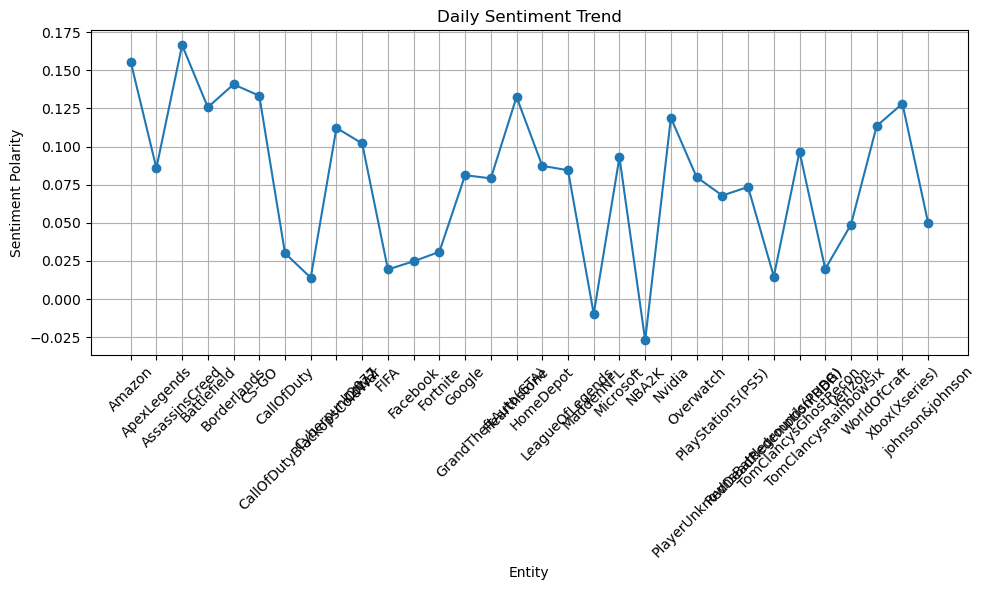

In [20]:
import matplotlib.pyplot as plt

# Plotting sentiment trends
plt.figure(figsize=(10, 6))
plt.plot(daily_sentiment.index, daily_sentiment.values, marker='o', linestyle='-')
plt.title('Daily Sentiment Trend')
plt.xlabel('Entity')
plt.ylabel('Sentiment Polarity')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


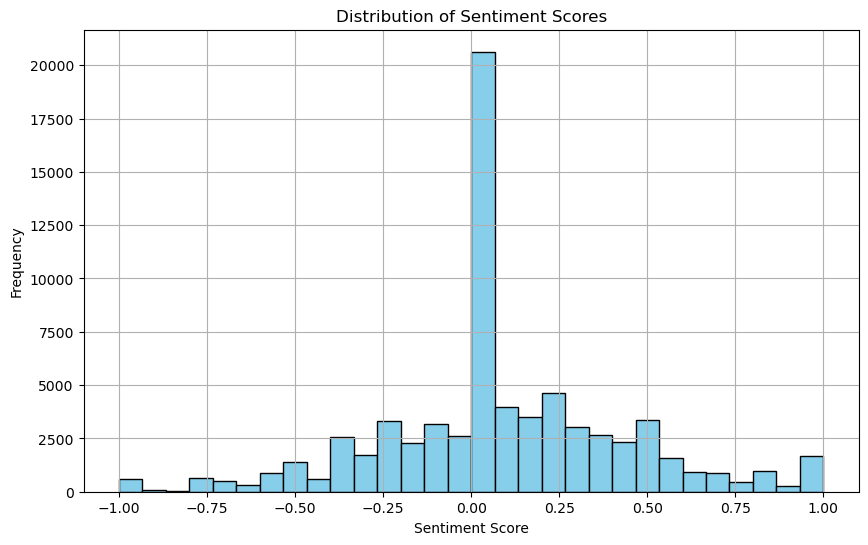

In [21]:
plt.figure(figsize=(10, 6))
data['Sentiment'].plot(kind='hist', bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [22]:
# Word clouds for positive and negative tweets
positive_tweets = ' '.join(data[data['Sentiment'] > 0]['Content'])
negative_tweets = ' '.join(data[data['Sentiment'] < 0]['Content'])

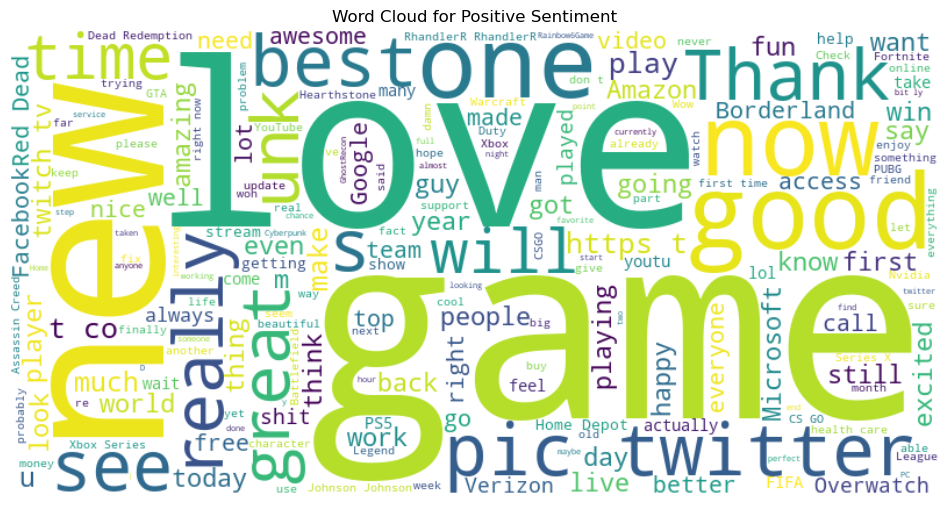

In [24]:
from wordcloud import WordCloud
# Word cloud for positive sentiment
plt.figure(figsize=(12, 8))
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_tweets)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Sentiment')
plt.axis('off')
plt.show()

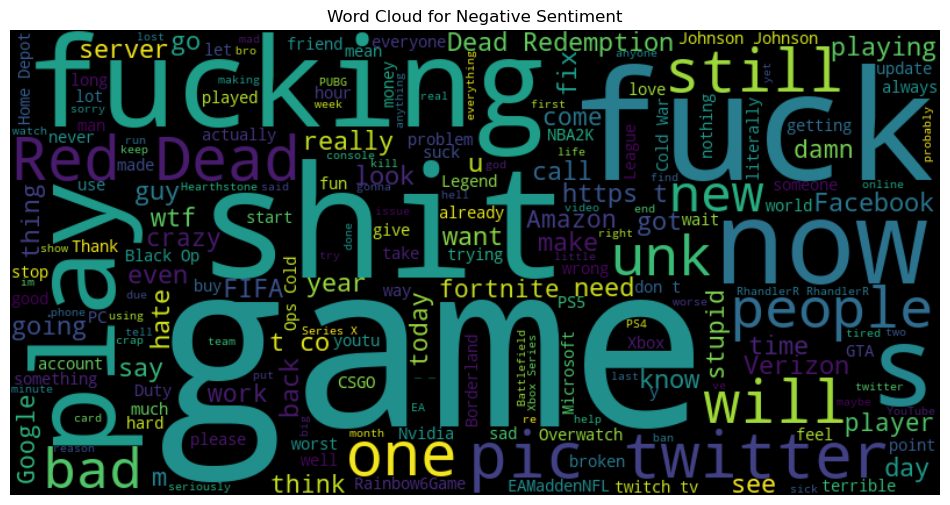

In [25]:
# Word cloud for negative sentiment
plt.figure(figsize=(12, 8))
wordcloud_negative = WordCloud(width=800, height=400, background_color='black').generate(negative_tweets)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud for Negative Sentiment')
plt.axis('off')
plt.show()